In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [185]:
original_df = pd.read_csv('data.txt', sep=' ',header=None)
original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [186]:
print(original_df[24].unique())
original_df.describe()


[1 2]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.00000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,2.582500,20.65125,2.547500,31.908750,2.106250,3.39750,2.673750,2.841250,2.36625,35.406250,...,0.230000,0.101250,0.910000,0.037500,0.175000,0.71250,0.021250,0.201250,0.628750,1.298750
std,1.242023,12.15635,1.084765,27.352617,1.567812,1.20054,0.700303,1.106833,1.06114,11.470317,...,0.421096,0.301848,0.286361,0.190102,0.380205,0.45288,0.144307,0.401185,0.483441,0.457996
min,1.000000,4.00000,0.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.00000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,12.00000,2.000000,13.000000,1.000000,3.00000,2.000000,2.000000,1.00000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,18.00000,2.000000,23.000000,1.000000,3.00000,3.000000,3.000000,2.00000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,24.00000,4.000000,39.000000,3.000000,5.00000,3.000000,4.000000,3.00000,41.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,2.000000
max,4.000000,72.00000,4.000000,159.000000,5.000000,5.00000,4.000000,4.000000,4.00000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000


In [187]:
X_train, X_test, y_train, y_test = train_test_split(original_df.iloc[:,:-1],
                                                    original_df.iloc[:,-1],
                                                    train_size=0.6,
                                                    shuffle=True,
                                                    random_state=42)
# Building the linear model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train )

SVC(kernel='linear')

/home/mohamed-abdelaziz/miniconda3/envs/colab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


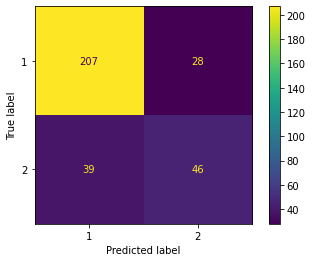

In [188]:
plot_confusion_matrix(svm_clf,
                      X_test,
                      y_test,
                      values_format='d')

In [189]:
def accuracy(model, data):
    accuracy_dict = defaultdict()

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(original_df.iloc[:,:-1],
                                                            original_df.iloc[:,-1],
                                                            train_size=0.6,
                                                            shuffle=True,
                                                            random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        accuracy_dict[i] = acc

        acc = np.mean(list(accuracy_dict.values()))
        return acc

In [191]:
score = accuracy(svm_clf, original_df)
print('Accuracy', score )


Accuracy 0.790625


# Normalization

In [193]:
# Scaling each feature by substracting it form its mean and divide it by its std.
scaler = StandardScaler()
scaler.fit(original_df.iloc[:,:-1])
df2 =scaler.transform(original_df.iloc[:,:-1])

In [194]:
df2 = pd.concat([pd.DataFrame(df2), original_df.iloc[:,-1]], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.274928,-1.205988,1.339838,-0.728311,1.846880,1.335651,0.466161,1.047561,-1.288336,2.756115,...,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,-0.501952,0.768412,1
1,-0.469286,2.251158,-0.505033,1.027647,-0.706043,-0.331308,-0.962686,-0.760527,-1.288336,-1.169509,...,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,-0.501952,0.768412,2
2,1.141997,-0.712110,1.339838,-0.399069,-0.706043,0.502172,0.466161,0.143517,-1.288336,1.185866,...,-0.546536,-0.335643,0.314485,-0.197386,-0.460566,0.635223,-0.147348,1.992221,-1.301385,1
3,-1.274928,1.757280,-0.505033,1.722713,-0.706043,0.502172,0.466161,1.047561,-0.345364,0.836921,...,-0.546536,-0.335643,-3.179797,-0.197386,-0.460566,-1.574249,-0.147348,-0.501952,0.768412,1
4,-1.274928,0.275646,0.417402,0.625240,-0.706043,-0.331308,0.466161,1.047561,1.540581,1.534810,...,1.829707,-0.335643,0.314485,-0.197386,-0.460566,-1.574249,-0.147348,-0.501952,0.768412,2


In [195]:
acc = accuracy(svm_clf, df2)
print('new accuracy', acc)
#  no much improvement

0.790625

In [211]:
param_grid = [
  {'C': [0.5, 1, 10, 100],
   'gamma':['scale', 1, 0.1, .01, .001]},
]

# estimator__C
optimal_params  = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
  )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)



{'C': 1000, 'gamma': 0.0001}


In [212]:
svm_clf = SVC(kernel='linear', C= 1000, gamma=.0001)
svm_clf.fit(X_train, y_train )

SVC(C=1000, gamma=0.0001, kernel='linear')

/home/mohamed-abdelaziz/miniconda3/envs/colab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


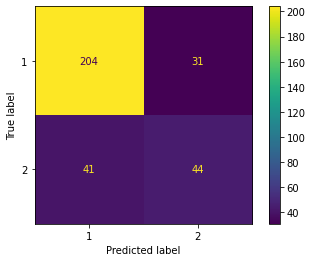

In [213]:
plot_confusion_matrix(svm_clf,
                      X_test,
                      y_test,
                      values_format='d')

In [ ]:
score = accuracy(svm_clf, original_df)
print('Accuracy', score )